In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [7]:
datos = pd.read_excel('./SimpleLinealRegression.xlsx')

In [8]:
x = datos[['Reduccion de solidos']] # variable indpendiente
y = datos[['Reduccion de la demanda de oxigeno']] # variable dependiente

In [13]:
clf = LinearRegression()
clf.fit(x,y) # entrenar el modelo

LinearRegression()

In [99]:
b1 = clf.coef_[0][0]
b0 = clf.intercept_[0]

print("Pendiente:", b1)
print("Intercepto:",b0)

Pendiente: 0.9036432105793233
Intercepto: 3.829633197588702


In [92]:
# Estimación (x=100) ->  // Recta regresión: y = a + bx : 
valor_x = [[100]]  # 'x' como una lista de listas
prediccion = clf.predict(valor_x)
print("La predicción del modelo cuando x=100 es:", prediccion[0][0])

La predicción del modelo cuando x=100 es: 94.19395425552104


/home/albertlnz/Desktop/Programming/LANGUAGES/Python/STUDY_PROJECTS/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
# Error estándard de la regresión (Sxy):
y_pred = clf.predict(x)
n = len(y)
sxy = np.sqrt(np.sum((y - y_pred) ** 2, axis=0) / (n - 2))
print("Error estándard de la regresión:", sxy.iloc[0])

Error estándard de la regresión: 3.229537629956157


In [96]:
# Coeficiente de correlación para la recta de regresión (Coeficiente de Pearson) (r)
coef_Pearson = np.corrcoef(y.values.flatten(), y_pred.flatten())[0, 1]
print("Coeficiente de correlacion de Pearson:", coef_Pearson)

Coeficiente de correlacion de Pearson: 0.9554793566657452


In [84]:
# Coeficiente de determinación (r²)
r2 = r2_score(y, y_pred) * 100
print("Coeficiente de determinación:", r2, "%")

Coeficiente de determinación: 91.29408010143867 %


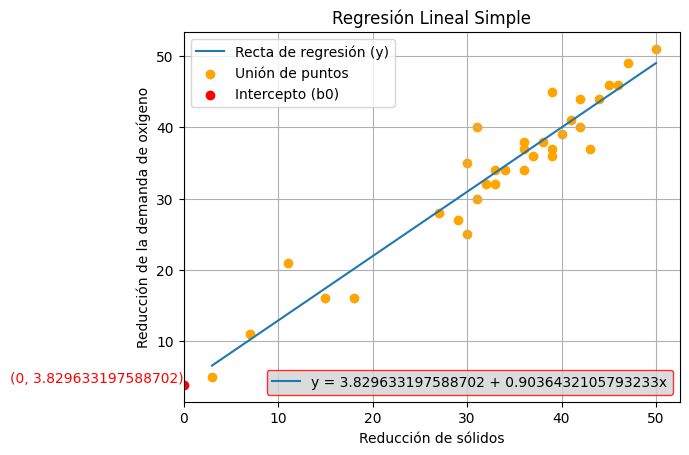

In [77]:
plt.plot(x, clf.predict(x)) # linea de predicción (azul)
plt.scatter(x,y, color='orange') # grafico uniendo puntos (naranja)
plt.title("Regresión Lineal Simple")
plt.xlabel("Reducción de sólidos")
plt.ylabel("Reducción de la demanda de oxígeno")
plt.scatter(0, b0, color='red', label='Punto (0, b0)')
plt.text(0, b0, f'({0}, {b0})', verticalalignment='bottom', horizontalalignment='right', color='red')
leyenda1 = plt.legend(["Recta de regresión (y)", "Unión de puntos", "Intercepto (b0)"])
leyenda2 =  plt.legend([f"y = {b0} + {b1}x"], loc="lower right", facecolor='lightgrey', edgecolor='red')
plt.gca().add_artist(leyenda1)
plt.xlim(xmin=0)
plt.grid()
plt.show()